In [2]:
import numpy as np
import matplotlib.pyplot as plt
path = "G:\\My Drive\\uni\\Machine Learning intro\\Introduction-To-Machine-Learning\\ex3\\mnist_all.npz"
np.set_printoptions(threshold=np.inf)
data = np.load(path)

In [3]:
def get_random_samples(digit, m):
    X = data[f'train{digit}']
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    samples = X[indices][:m]
    labels = np.full((m, 1), digit)
    return samples, labels


def get_small_sample(samples_per_digit):
    # make dictionary smaller sample from data
    X = {f"train{i}": get_random_samples(i, samples_per_digit)[
        0] for i in range(10)}
    return X



def kmeans(X, k, t):
    """
    :param X: numpy array of size (m, d) containing the test samples
    :param k: the number of clusters
    :param t: the number of iterations to run
    :return: a column vector of length m, where C(i) ∈ {1, . . . , k} is the identity of the cluster in which x_i has been assigned.
    """
    m, d = X.shape
    C = [np.array([]) for i in range(k)]
    centroids = X[np.random.choice(range(X.shape[0]), size=k)]
    for _ in range(t):
        for i in range(k):
            distance = [xi - centroids[i] for xi in X]
            min_x = np.argmin([np.linalg.norm(di) for di in distance])
            for j,cluster in enumerate(C):
                if min_x in cluster:
                    cluster = cluster[cluster != min_x]
                    centroids[j] = (1.0/len(cluster)) * sum(cluster)
            C[i] = np.append(C[i] ,min_x)
            centroids[i] = (1.0/len(C[i])) * sum(C[i]) 
            
    res = [np.argmin([np.linalg.norm(xi - centroid) for centroid in centroids]) for xi in X ]
    res = np.array(res)
    return res.reshape(-1, 1)


for each cluster: <br>
(1)what is its size <br>
(2) which label is most common in it, and <br>
(3) what percentage of the points in the cluster have this label.<br>
Report the classification error on the sample, that would result if we classified all the points in each cluster using the cluster’s most common label.<br>
Explain your calculation.<br>

In [25]:
def make_table(data, cols, rows):
    fig, ax = plt.subplots(figsize=(12, 2))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=data, colLabels=cols, rowLabels=rows, cellLoc = 'center', loc='center', fontsize=20)
    plt.show()

g:\My Drive\uni\Machine Learning intro\Introduction-To-Machine-Learning\.venv\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
g:\My Drive\uni\Machine Learning intro\Introduction-To-Machine-Learning\.venv\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
g:\My Drive\uni\Machine Learning intro\Introduction-To-Machine-Learning\.venv\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


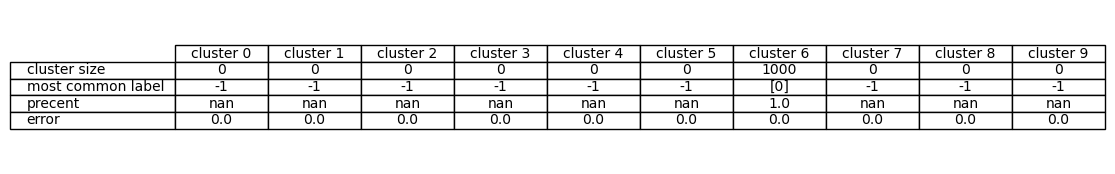

In [36]:
def analyze_kmeans_unlabeld():
    X = np.concatenate([data[f'train{i}'] for i in range(10)])
    Y = np.concatenate(
        [np.full((data[f'train{i}'].shape[0], 1), i) for i in range(10)])

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    samples = np.array(X[indices][:1000])
    labels = Y[indices][:1000]

    kmeans_res = kmeans(samples, 10, 20)

    clusters = np.empty((10,), dtype=object)
    for i in range(10):
        indices = np.where(kmeans_res == i)[0]
        clusters[i] = indices

    clsuters_size = np.array([len(cluster) for cluster in clusters])

    real_labels_per_cluster = [[labels[i]
                                for i in cluster] for cluster in clusters]
    most_common_label_in_cluster = []
    for real_labels in real_labels_per_cluster:
        if len(real_labels) > 0:
            most_common_label_in_cluster.append(
                max(real_labels, key=real_labels.count))
        else:
            most_common_label_in_cluster.append(-1)
    
    precent_of_most_common_label_in_cluster = [real_labels.count(most_common_label_in_cluster[i]) / clsuters_size[i] for i,real_labels in enumerate(real_labels_per_cluster)]

    errors = []
    for i in range(10):
        if clsuters_size[i] == 0:
            errors.append(0)
        else:
            errors.append(np.mean((np.array([most_common_label_in_cluster[i] for _ in range(
                clsuters_size[i])]).reshape(-1, 1)) != real_labels_per_cluster[i]))

    row_headers = ["cluster size", "most common label", "precent", "error"]
    col_headers = np.array([f"cluster {i}" for i in range(10)])

    table = np.vstack([clsuters_size, most_common_label_in_cluster, precent_of_most_common_label_in_cluster, errors])

    make_table(table, col_headers, row_headers)


analyze_kmeans_unlabeld()
